<h1>Mini Projeto 09 - Quadro geral dos últimos anos do Corinthians. </h1>
<i> 
<br>
    <b> Raspagem de dados </b> <br>
• Obter dados diretamente do site (raspagem)<br>
• Remover o Título e ajustar os nomes das colunas <br> 
• Remover PRIMEIRA e ÚLTIMA linha <br> 
• Remover todos os espaços <br> 
• Transoformar colunas em INTEIRO <br> 
• Criar um gráfico de linhas <br> 
    
<b> Raspagem do link: </b> https://pt.wikipedia.org/wiki/Sport_Club_Corinthians_Paulista


In [63]:
#Importando o Pandas, para limpeza de dados
#importando o Request para obter .json via API
#importando o matplotlib.pyplot para fazer o gráfico

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


<h3> Obter Dados </h3>

In [64]:
#OBTER DADOS e colocando em uma variável
link = 'https://pt.wikipedia.org/wiki/Sport_Club_Corinthians_Paulista'
resposta = requests.get(link)

table = pd.read_html(resposta.text)
dataset = table[11]
dataset

,0,1,2,3,4,5,6,7,8,9
0,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano
1,Ano,J,V,E,D,GP,GC,SG,AP,MP
2,2014,18,12,5,1,34,14,20,"75,93%",30 944
3,2015,35,26,6,3,74,21,53,"80,00%",33 679
4,2016,34,24,8,2,62,17,45,"78,43%",30 244
5,2017,34,20,11,3,50,24,26,"69,61%",34 419
6,2018,35,19,9,7,41,25,16,"64,44%",32 272
7,2019,38,19,13,6,47,28,19,61.40%,33 182
8,2020,23,10,8,5,28,23,5,55.07%,30 072
9,2021,37,19,10,8,63,38,25,60.36%,32 662


<h3> Usar Segunda linha como cabeçalho </h3> <br>
<b> Índice 0</b> <i>Título </i><br>
<b> Índice 1</b> <i> Nome das colunas </i>

In [65]:
dataset.columns = dataset.iloc[1]

display(dataset.head(3))

1,Ano,J,V,E,D,GP,GC,SG,AP,MP
0,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano,Quadro geral por ano
1,Ano,J,V,E,D,GP,GC,SG,AP,MP
2,2014,18,12,5,1,34,14,20,"75,93%",30 944


<h3> Apagar a Primeira e Última linha  </h3> 


In [66]:
#apagando primeira linha
dataset.drop(dataset.index[[0,1]], inplace = True)

#apagando última linha
dataset.drop(dataset.index[[0,-1]], inplace = True)

dataset

1,Ano,J,V,E,D,GP,GC,SG,AP,MP
3,2015,35,26,6,3,74,21,53,"80,00%",33 679
4,2016,34,24,8,2,62,17,45,"78,43%",30 244
5,2017,34,20,11,3,50,24,26,"69,61%",34 419
6,2018,35,19,9,7,41,25,16,"64,44%",32 272
7,2019,38,19,13,6,47,28,19,61.40%,33 182
8,2020,23,10,8,5,28,23,5,55.07%,30 072
9,2021,37,19,10,8,63,38,25,60.36%,32 662
10,2022,13,9,3,1,22,4,18,76.92%,32 301


In [67]:
print(dataset.dtypes)
print('\n')

#SHAPE (nº de linhas,nº de colunas )
shape = dataset.shape
print(shape)
print('linhas,colunas')



1
Ano    object
J      object
V      object
E      object
D      object
GP     object
GC     object
SG     object
AP     object
MP     object
dtype: object


(8, 10)
linhas,colunas


<h3> Remover todos os espaços </h3>

In [68]:
#Substituir uma todos os ESPAÇOS por nada presente em toda tabela
dataset = dataset.replace(' ','', regex=True)
display(dataset)

1,Ano,J,V,E,D,GP,GC,SG,AP,MP
3,2015,35,26,6,3,74,21,53,"80,00%",33679
4,2016,34,24,8,2,62,17,45,"78,43%",30244
5,2017,34,20,11,3,50,24,26,"69,61%",34419
6,2018,35,19,9,7,41,25,16,"64,44%",32272
7,2019,38,19,13,6,47,28,19,61.40%,33182
8,2020,23,10,8,5,28,23,5,55.07%,30072
9,2021,37,19,10,8,63,38,25,60.36%,32662
10,2022,13,9,3,1,22,4,18,76.92%,32301


### Transformar colunas em Inteiro

In [69]:
dataset['Ano'] = dataset['Ano'].astype(int)
dataset['J'] = dataset['J'].astype(int)
dataset['V'] = dataset['V'].astype(int)
dataset['E'] = dataset['E'].astype(int)
dataset['D'] = dataset['D'].astype(int)
dataset['GP'] = dataset['GP'].astype(int)
dataset['GC'] = dataset['GC'].astype(int)
dataset['SG'] = dataset['SG'].astype(int)
dataset['MP'] = dataset['MP'].astype(int)

dataset.dtypes

1
Ano     int32
J       int32
V       int32
E       int32
D       int32
GP      int32
GC      int32
SG      int32
AP     object
MP      int32
dtype: object

### Gráfico

<b> 1 - Criar variáveis </b> 


In [70]:
x = dataset['Ano']
y1 = dataset['V']
y2 = dataset['D']
y3 = dataset['E']

<b> 2 - Criar Loops - para depois fazer o Rótulo </b> 

In [71]:
for(i, valor) in enumerate(dataset['V'], start=0):
    print(f'loop {i}: {valor}')

loop 0: 26
loop 1: 24
loop 2: 20
loop 3: 19
loop 4: 19
loop 5: 10
loop 6: 19
loop 7: 9


<b> 3- gráfico de Linha </b> 

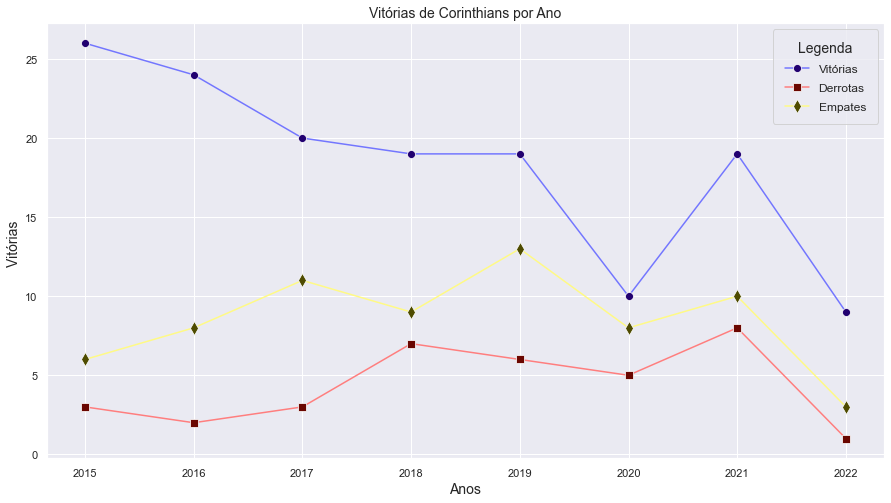

In [72]:
plt.figure(figsize=(15,8))
plt.title('Vitórias de Corinthians por Ano', fontsize='14')
plt.ylabel('Qtd de vitórias, empates e derrodas ', fontsize='14')
plt.xlabel('Anos', fontsize='14')
  
#vitória    
sns.set_theme(style="darkgrid")
sns.lineplot(data=dataset,
             x=x,
             y=y1,
             color='#7376ff',
             drawstyle='default',
             marker='o', 
             markerfacecolor='#210070',
             markersize=8,
             fillstyle='full'
)

#derrota
sns.lineplot(data=dataset,
             x=x,
             y=y2,
             color='#ff7e7e',
             drawstyle='default',
             marker='s', 
             markerfacecolor='#6a0600',
             markersize=8,
            )

#empare
sns.lineplot(data=dataset,
             x=x,
             y=y3,
             color='#fffa85',
             drawstyle='default',
             marker='d', 
             markerfacecolor='#4e4b00',
             markersize=10,
            )
""
plt.legend(labels=["Vitórias","Derrotas","Empates"],
           title = "Legenda",
           title_fontsize = "14",
           fontsize = 'medium', 
           borderpad=1,
           labelspacing = 0.7
           
         )



In [73]:
analise_grafico = dataset.drop(['D','GP','GC','SG','AP','MP'], axis=1)
analise_grafico


1,Ano,J,V,E
3,2015,35,26,6
4,2016,34,24,8
5,2017,34,20,11
6,2018,35,19,9
7,2019,38,19,13
8,2020,23,10,8
9,2021,37,19,10
10,2022,13,9,3
